In [55]:
import pandas as pd
from google.colab import files

# Upload file Excel hasil penglabelan
uploaded = files.upload()

# Baca file Excel
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

# Tampilkan 5 baris pertama untuk cek
df.head()


Saving penglabelan data 2 38 (jam).xlsx to penglabelan data 2 38 (jam) (4).xlsx


,Cleaned,label
0,wakil ketua komisi lindung anak indonesia kpai...,negatif
1,wakil ketua komisi lindung anak indonesia kpai...,negatif
2,masuk barak king dedi mulyadi,positif
3,kepala daerah jawa jejak gubernur dedi mulyadi...,netral
4,siswa dedi mulyadi luas didik barak militer li...,positif


In [56]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [57]:
print("Kolom:", df.columns.tolist())
Cleaned_col = 'Cleaned'
label_col = 'label'

Kolom: ['Cleaned', 'label']


In [58]:
from sklearn.model_selection import train_test_split

# Fill missing values in the 'Cleaned' column with empty strings
df[Cleaned_col] = df[Cleaned_col].fillna('')

X = df[Cleaned_col]
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Jumlah train: {len(X_train)}, test: {len(X_test)}")

Jumlah train: 715, test: 179


In [59]:
# Fill missing values in the 'Cleaned' column with empty strings
df[Cleaned_col] = df[Cleaned_col].fillna('')

X = df[Cleaned_col]
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Latih model random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Prediksi & evaluasi
y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

     negatif       0.58      0.52      0.55        60
      netral       0.39      0.28      0.33        57
     positif       0.56      0.77      0.65        62

    accuracy                           0.53       179
   macro avg       0.51      0.52      0.51       179
weighted avg       0.52      0.53      0.51       179

Confusion Matrix:
[[31 16 13]
 [17 16 24]
 [ 5  9 48]]


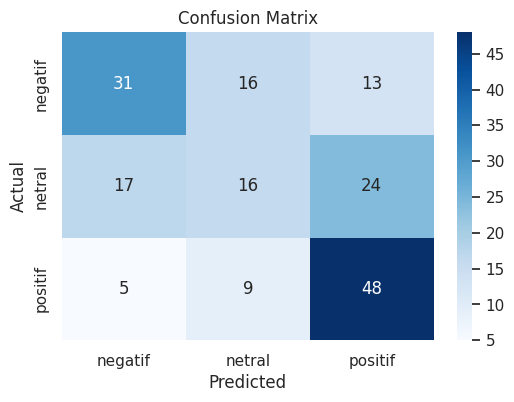

In [61]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi
y_pred = model.predict(X_test_tfidf)

# Evaluasi ringkas
accuracy = accuracy_score(y_test, y_pred)
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Akurasi: {accuracy:.2f}")
print(f"Precision (Macro Avg): {macro_precision:.2f}")
print(f"Recall (Macro Avg): {macro_recall:.2f}")
print(f"F1-Score (Macro Avg): {macro_f1:.2f}")


Akurasi: 0.53
Precision (Macro Avg): 0.51
Recall (Macro Avg): 0.52
F1-Score (Macro Avg): 0.51


In [52]:
model = RandomForestClassifier(class_weight='balanced')


In [53]:
print(df['label'].value_counts())

label
positif    308
negatif    299
netral     287
Name: count, dtype: int64


/tmp/ipython-input-63-3165988090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


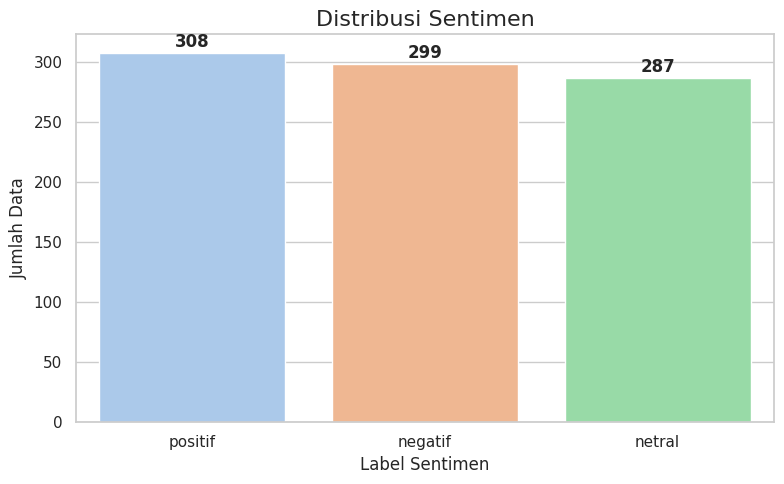

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung distribusi label
label_counts = df['label'].value_counts()

# Atur tampilan visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')

# Tambahkan teks jumlah data di atas tiap batang
for i, v in enumerate(label_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Label dan judul grafik
plt.title("Distribusi Sentimen", fontsize=16)
plt.xlabel("Label Sentimen", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)

plt.tight_layout()
plt.show()